In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

KeyboardInterrupt: 

In [ ]:
data = load_breast_cancer(as_frame=True)
df = data.data
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
X = df.values
y = data.target.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5, max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)

In [ ]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [ ]:
accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)

(0.978021978021978, 0.9649122807017544)

**overfitting** - invata foarte bine pe datele de antrenament, dar nu reuseste performante bune pe datele de test => nu e capabil sa generalizeze foarte bine => a invatat pe de rost datele de antrenament

**underfitting** - metrici mici si pe train si pe test => 1. schimbam modelul ca nu este suficient de complex pentru datele noastre, 2. schimbi datele ca sunt ambigue

In [ ]:
plt.figure(figsize=(40,20))
plot_tree(dt, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()

NameError: name 'plt' is not defined

In [ ]:
plt.figure(figsize=(40,20))
plot_tree(rf.estimators_[0], filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()

NameError: name 'plt' is not defined

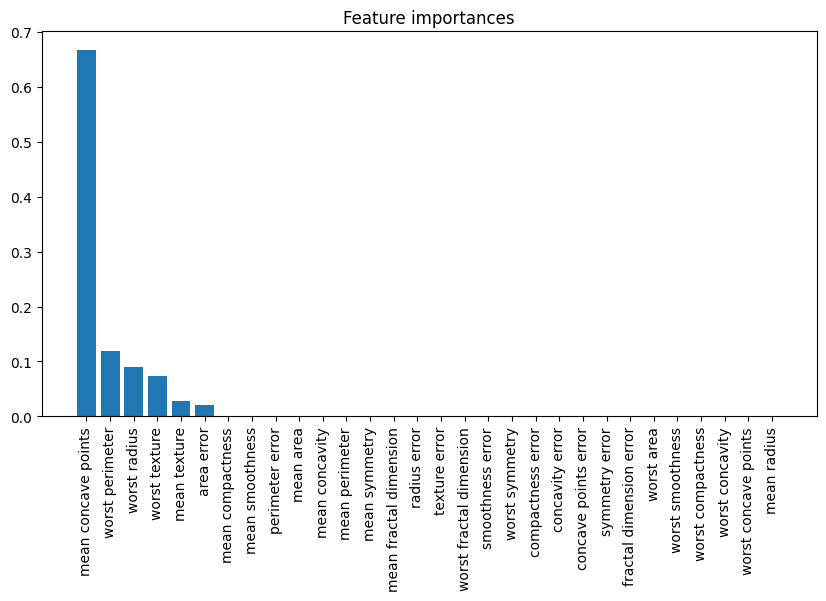

In [ ]:
# prompt: plot feature importances

importances = dt.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 5))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), data.feature_names[indices], rotation=90)
plt.show()


In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)

(0.9406593406593406, 0.956140350877193)